In [16]:
import pandas as pd

tp='/content/train-perceptron (1).txt'
df= pd.read_csv(tp, sep=" ", header=None, names=['A', 'B', 'class'], dtype='Float64')
df

,A,B,class
0,1.0,1.0,1.0
1,1.0,-1.0,1.0
2,2.0,2.5,2.0
3,0.0,2.0,2.0
4,2.0,3.0,2.0
5,4.0,5.0,1.0


from matplotlib import pyplot as plt
df['A'].plot(kind='hist', bins=20, title='A')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['B'].plot(kind='hist', bins=20, title='B')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['class'].plot(kind='hist', bins=20, title='class')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='A', y='B', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='B', y='class', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['A'].plot(kind='line', figsize=(8, 4), title='A')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['B'].plot(kind='line', figsize=(8, 4), title='B')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['class'].plot(kind='line', figsize=(8, 4), title='class')
plt.gca().spines[['top', 'right']].set_visible(False)

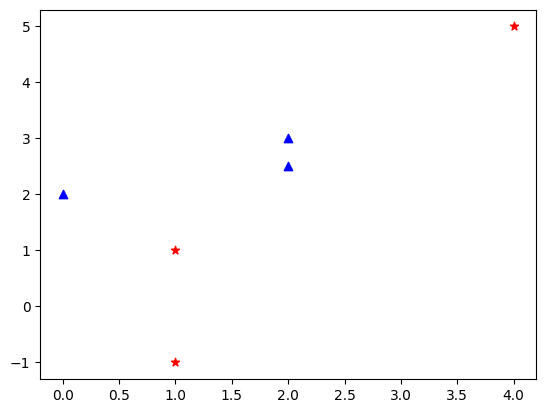

In [21]:
import matplotlib.pyplot as plt

c1=df[df.iloc[:,2]==1]
c2=df[df.iloc[:,2]==2]

plt.scatter(c1.iloc[:,0],c1.iloc[:,1],color='red', marker='*')
plt.scatter(c2.iloc[:,0],c2.iloc[:,1],color='blue', marker='^')

In [36]:
import numpy as np

def hD_gen(data):
    x1 = data['A']
    x2 = data['B']
    x1_sq = x1 ** 2
    x2_sq = x2 ** 2
    x1_x2 = x1 * x2
    ones = np.ones_like(x1, dtype=float)
    hd_points = np.column_stack((x1_sq, x2_sq, x1_x2, x1, x2, ones, data['class']))
    return hd_points

c1_data=hD_gen(c1)
c2_data=hD_gen(c2)

c2_data[:, :-1] *= -1

fData= np.vstack((c1_data, c2_data))
print(fData)

[[1.0 1.0 1.0 1.0 1.0 1.0 1.0]
 [1.0 1.0 -1.0 1.0 -1.0 1.0 1.0]
 [16.0 25.0 20.0 4.0 5.0 1.0 1.0]
 [-4.0 -6.25 -5.0 -2.0 -2.5 -1.0 2.0]
 [-0.0 -4.0 -0.0 -0.0 -2.0 -1.0 2.0]
 [-4.0 -9.0 -6.0 -2.0 -3.0 -1.0 2.0]]


In [72]:
def oneAtTime(X,y,lRate,w0):
  mis= True
  itr=0

  while mis:
    mis= False
    for i in range(len(X)):
      if np.dot(X[i],w0) <= 0:
        w0 += lRate*X[i].astype(float)
        mis=True
        #print("miss", w0)
    itr+=1
    #print("it", itr)
  return w0, itr


def ManyAtTime(X,y,lRate,w0):
  mis= True
  itr=0;

  while mis:
    mis=False
    err= np.where(np.dot(X,w0) <=0)[0]
    if len(err) >0:
      w0+= lRate * np.sum(X[err],axis=0).astype(float)
      mis=True
    itr += 1

  return w0, itr


X= fData[:, :-1]
print(X[1])
y= fData[:, -1]

learningRate= np.arange(0.1, 1.1, 0.3)

for lr in learningRate:
  print(lr)
  w0= np.zeros(X.shape[1], dtype=float)
  w, itrr = oneAtTime(X,y,lr,w0)
  print(w)
  print(itrr)

  w0= np.zeros(X.shape[1], dtype=float)
  wm, itrm = ManyAtTime(X,y,lr,w0)
  print(lr)
  print(wm)
  print(itrm)

[1.0 1.0 -1.0 1.0 -1.0 1.0]
0.1
[ 5.   -3.35  2.2  -0.6  -4.7   1.6 ]
94
0.1
[ 6.5   -4.425  2.8   -0.5   -5.45   1.2  ]
105
0.4
[ 20.  -13.4   8.8  -2.4 -18.8   6.4]
94
0.4
[ 26.  -17.7  11.2  -2.  -21.8   4.8]
105
0.7000000000000001
[ 35.   -23.45  15.4   -4.2  -32.9   11.2 ]
94
0.7000000000000001
[ 45.5   -30.975  19.6    -3.5   -38.15    8.4  ]
105
1.0000000000000002
[ 50.  -33.5  22.   -6.  -47.   16. ]
94
1.0000000000000002
[ 65.   -44.25  28.    -5.   -54.5   12.  ]
105
